In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = "/content/drive/MyDrive/Day 20_E-Commerce_Data.csv"
df = pd.read_csv(file_path)
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281,Home Decor,3093.0,24.0,3.0,NaN,2023-10-08


In [3]:
df['Review_Text'].fillna('No Review', inplace=True)
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df

<ipython-input-3-b550df30d2fa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_Text'].fillna('No Review', inplace=True)
<ipython-input-3-b550df30d2fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,Clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,Clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,Home Decor,3429.0,51.0,2.0,Value for money,2023-01-03
3,4,Books,4568.0,35.0,3.0,Value for money,2023-01-04
4,5,Electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
...,...,...,...,...,...,...,...
500,46,Home Decor,2965.0,41.0,4.0,Not as expected,2023-02-15
501,109,Home Decor,384.0,56.0,1.0,Excellent product!,2023-04-19
502,52,Electronics,2434.0,26.0,3.0,Value for money,2023-02-21
503,281,Home Decor,3093.0,24.0,3.0,No Review,2023-10-08


In [4]:
df.drop_duplicates(subset=['Review_Text'], keep='first', inplace=True)
df['Rating'] = df['Rating'].clip(1, 5)
df['Product_Category'] = df['Product_Category'].str.strip().str.lower()
df

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,home decor,3429.0,51.0,2.0,Value for money,2023-01-03
4,5,electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
5,6,beauty,4952.0,42.0,1.0,Fast delivery,2023-01-06
55,56,electronics,330.0,19.0,3.0,No Review,2023-02-25


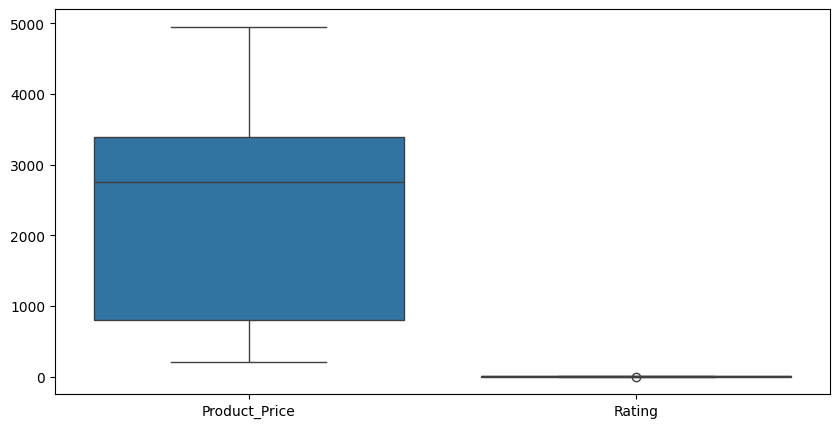

,Order_ID,Product_Category,Product_Price,Customer_Age,Rating,Review_Text,Order_Date
0,1,clothing,3262.0,58.0,3.0,Would not recommend,2023-01-01
1,2,clothing,214.0,20.0,3.0,Excellent product!,2023-01-02
2,3,home decor,3429.0,51.0,2.0,Value for money,2023-01-03
4,5,electronics,2237.0,32.0,4.0,Not as expected,2023-01-05
5,6,beauty,4952.0,42.0,1.0,Fast delivery,2023-01-06
55,56,electronics,330.0,19.0,3.0,No Review,2023-02-25


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Product_Price', 'Rating']])
plt.show()

q1 = df['Product_Price'].quantile(0.25)
q3 = df['Product_Price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Product_Price'] >= lower_bound) & (df['Product_Price'] <= upper_bound)]
df

In [9]:
cleaned_file_path = "/content/drive/MyDrive/Cleaned_E-Commerce_Data.csv"
df.to_csv(cleaned_file_path, index=False)